## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

Name - "Asmita Kulkarni"
Student Id - "48111287"

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [10]:
ecommerce_data = pd.read_csv('/Users/asmitakulkarni/Downloads/cleaned_ecommerce_dataset.csv')
len(ecommerce_data)

2685

### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.

  Hints: To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [11]:
ecommerce_data.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [12]:
ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


In [13]:
#Importing and Initializing OriginalEncoder
from sklearn.preprocessing import OrdinalEncoder
og_encoder = OrdinalEncoder()

In [14]:
#Converting categorical values to numerical values
encode_cols = ['gender', 'category', 'review']
ecommerce_data[encode_cols] = og_encoder.fit_transform(ecommerce_data[encode_cols])

In [15]:
# Calculating the correlations between ratings and other columns 
correlations = ecommerce_data[['helpfulness', 'gender', 'category', 'review', 'rating']].corr()
correlations['rating']

helpfulness   -0.007523
gender        -0.034337
category      -0.163158
review        -0.036118
rating         1.000000
Name: rating, dtype: float64

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [16]:
#Splitting Training and Testing Data 
from sklearn.model_selection import train_test_split

X = ecommerce_data[['helpfulness', 'gender', 'category', 'review']]
y = ecommerce_data['rating']

# Case 1: Training data containing 10% of the entire data
X_train_case1, X_test_case1, y_train_case1, y_test_case1 = train_test_split(X, y, test_size=0.9, random_state=6)

# Case 2: Training data containing 90% of the entire data
X_train_case2, X_test_case2, y_train_case2, y_test_case2 = train_test_split(X, y, test_size=0.1, random_state=6)

# Print the shape of training and testing sets for both cases
print("Case 1:")
print("Training data shape:", X_train_case1.shape, y_train_case1.shape)
print("Testing data shape:", X_test_case1.shape, y_test_case1.shape)

print("\nCase 2:")
print("Training data shape:", X_train_case2.shape, y_train_case2.shape)
print("Testing data shape:", X_test_case2.shape, y_test_case2.shape)

Case 1:
Training data shape: (268, 4) (268,)
Testing data shape: (2417, 4) (2417,)

Case 2:
Training data shape: (2416, 4) (2416,)
Testing data shape: (269, 4) (269,)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features from helpfulness/gender/category/review regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Defining feature sets for different models
case1_mc = ['category', 'review']
case1_lc = ['gender', 'helpfulness']
case2_mc = ['category', 'review']
case2_lc = ['gender', 'helpfulness']

# Initializing linear regression models
model_a = LinearRegression()
model_b = LinearRegression()
model_c = LinearRegression()
model_d = LinearRegression()

# Training models
model_a.fit(X_train_case1[case1_mc], y_train_case1)
model_b.fit(X_train_case1[case1_lc], y_train_case1)
model_c.fit(X_train_case2[case2_mc], y_train_case2)
model_d.fit(X_train_case2[case2_lc], y_train_case2)


LinearRegression()

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [18]:
# Make predictions
y_pred_a = model_a.predict(X_test_case1[case1_mc])
y_pred_b = model_b.predict(X_test_case1[case1_lc])
y_pred_c = model_c.predict(X_test_case2[case2_mc])
y_pred_d = model_d.predict(X_test_case2[case2_lc])

# Calculate MSE and RMSE for each model
mse_a = mean_squared_error(y_test_case1, y_pred_a)
mse_b = mean_squared_error(y_test_case1, y_pred_b)
mse_c = mean_squared_error(y_test_case2, y_pred_c)
mse_d = mean_squared_error(y_test_case2, y_pred_d)

rmse_a = mse_a ** 0.5
rmse_b = mse_b ** 0.5
rmse_c = mse_c ** 0.5
rmse_d = mse_d ** 0.5

# Print results
print("Model A (Case 1, most correlated features):")
print("MSE:", mse_a)
print("RMSE:", rmse_a)

print("\nModel B (Case 1, least correlated features):")
print("MSE:", mse_b)
print("RMSE:", rmse_b)

print("\nModel C (Case 2, most correlated features):")
print("MSE:", mse_c)
print("RMSE:", rmse_c)

print("\nModel D (Case 2, least correlated features):")
print("MSE:", mse_d)
print("RMSE:", rmse_d)


Model A (Case 1, most correlated features):
MSE: 1.7881651251762356
RMSE: 1.3372229152898314

Model B (Case 1, least correlated features):
MSE: 1.8398265939861274
RMSE: 1.356402076814293

Model C (Case 2, most correlated features):
MSE: 1.6101491053103383
RMSE: 1.2689165084079954

Model D (Case 2, least correlated features):
MSE: 1.6807708957356966
RMSE: 1.2964454850612488


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

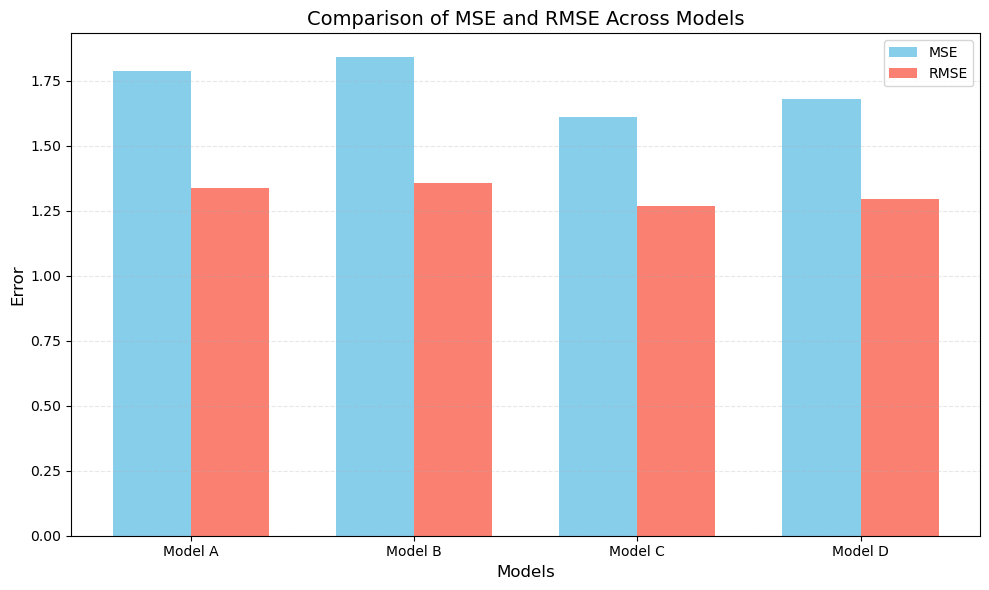

In [20]:
# Model names
model_names = ['Model A', 'Model B', 'Model C', 'Model D']

# Mean Squared Error (MSE) values for each model
mse_values = [1.7881651251762356, 1.8398265939861274, 1.6101491053103383, 1.6807708957356966]

# Root Mean Squared Error (RMSE) values for each model
rmse_values = [1.3372229152898314, 1.356402076814293, 1.2689165084079954, 1.2964454850612488]

# Width of the bars
bar_width = 0.35

# Set the index for the x-axis
x = np.arange(len(model_names))

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for MSE
ax.bar(x - bar_width/2, mse_values, bar_width, label='MSE', color='skyblue')

# Bar plot for RMSE
ax.bar(x + bar_width/2, rmse_values, bar_width, label='RMSE', color='salmon')

# Adding labels, title, and legend
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Error', fontsize=12)
ax.set_title('Comparison of MSE and RMSE Across Models', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Set y-axis to logarithmic scale for better visualization
#ax.set_yscale('log')

# Add gridlines for better readability
ax.grid(axis='y', linestyle='--',alpha = 0.3)

plt.tight_layout()
plt.show()

### Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


In [ ]:
#The infographic contains two tables that sort the 2008 Summer Olympic Games medals by total medals and gold medals. While there is nothing fundamentally deceptive about the data supplied, its manner in which it is presented could prove misleading.
#The infographic focuses on the countries that have won the most gold medals. This could overshadow the achievements of countries who excelled in other fields.
#The infographic just includes data from the 2008 Summer Olympics. This is a single data point that does not provide an entire picture of how these countries often perform or how other countries have performed previously.
#There are multiple factors that contribute to a country's overall Olympic success that are not addressed here.This infographic does not account for a country's population size, athlete resources, or which sports are included or removed from the Olympic Games.
#The infographic does not state where the data comes from, it raises concerns about its accuracy and credibility.